# Lab | Customer Analysis Final Round

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)
- Data Description.
- Goal.

### 02 - Getting Data
- Read the .csv file.

### 03 - Cleaning/Wrangling/EDA
- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data
- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling
- Apply model.

###  06 - Model Validation
- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting
- Present results.

### 01 - Problem (case study)

##### Information about the data set

The objective of this data is to understand customer demographics and buying behavior. Later during the week, we will use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth.

-> Missing descriptions for the meaning of the data. What do certain data columns mean? Where is this data from? What is our perspective?

-> without those informations it's difficult to formulate a clear goal and later on build a model that allows us to make predictions and derive actions to improve operations/business or whatever.



-> In the following I'm trying to maximize the total claim amount based on various variables

### 02 - Getting Data

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

print(data.shape)

(9134, 24)


### 03 - Cleaning/Wrangling/EDA

In [4]:
# Renaming columns

# 1) all lower case
col=[]
for columns in data.columns:
    col.append(columns.lower())
data.columns=col


# 2) correct wrong spelling

data=data.rename(columns={'employmentstatus':'employment status'})
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Checking for NULL values in the dataset

data.isna().sum()

--> Data for final Lab is already cleaned and contains no Null values anymore

##### Following thoughts on data cleaning I did with the earlier datasets

- for "month since last claim" it might make sense, that value is NULL since there might never been one -> keep it

- number of open complaints NaN -> set to 0

data2['number of open complaints'] = data2['number of open complaints'].fillna(0)

- vehicle type ignore - missing values since it's either A or empty

data2['vehicle type'].unique()

- depending on needs we can delete rows with missing values for vehicle class/vehicle size

data2['vehicle class'].unique()
data2['vehicle size'].unique()

- Executed for data3

data3= data2[data2['vehicle class'].isna()==False]

data3.isna().sum()
data3.shape

In [5]:
# Splitting categorical and numerical features

numericals= data.select_dtypes(['number'])
categoricals= data.select_dtypes(['object'])

display(numericals.head())
display(categoricals.head())

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [6]:
# Basic Exploration

display(numericals.describe().T)
display(categoricals.describe())

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,customer,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


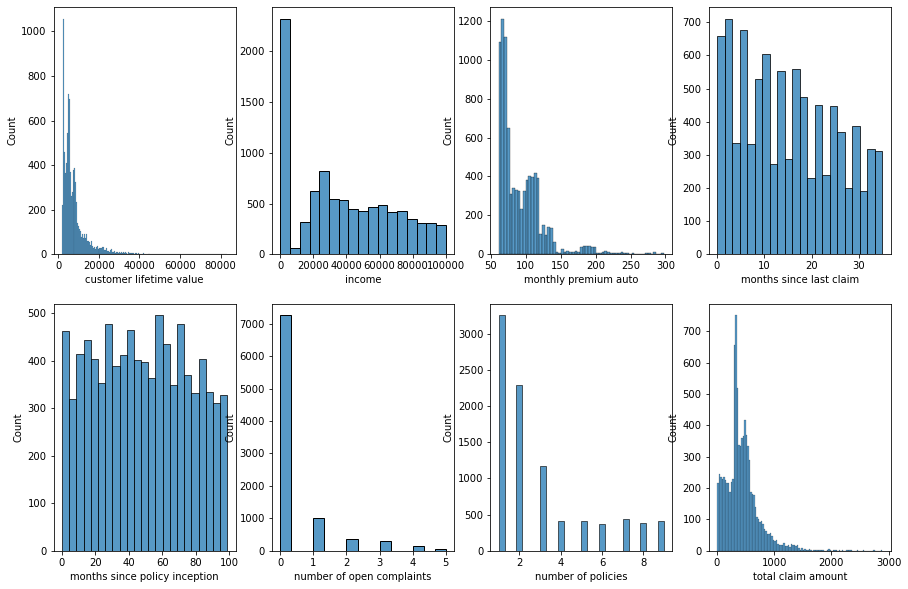

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(2,4,figsize=(15,10))
sns.histplot(data['customer lifetime value'], ax=ax[0,0])
sns.histplot(data['income'], ax=ax[0,1])
sns.histplot(data['monthly premium auto'], ax=ax[0,2])
sns.histplot(data['months since last claim'], ax=ax[0,3])
sns.histplot(data['months since policy inception'], ax=ax[1,0])
sns.histplot(data['number of open complaints'], ax=ax[1,1])
sns.histplot(data['number of policies'], ax=ax[1,2])
sns.histplot(data['total claim amount'], ax=ax[1,3])
plt.show()

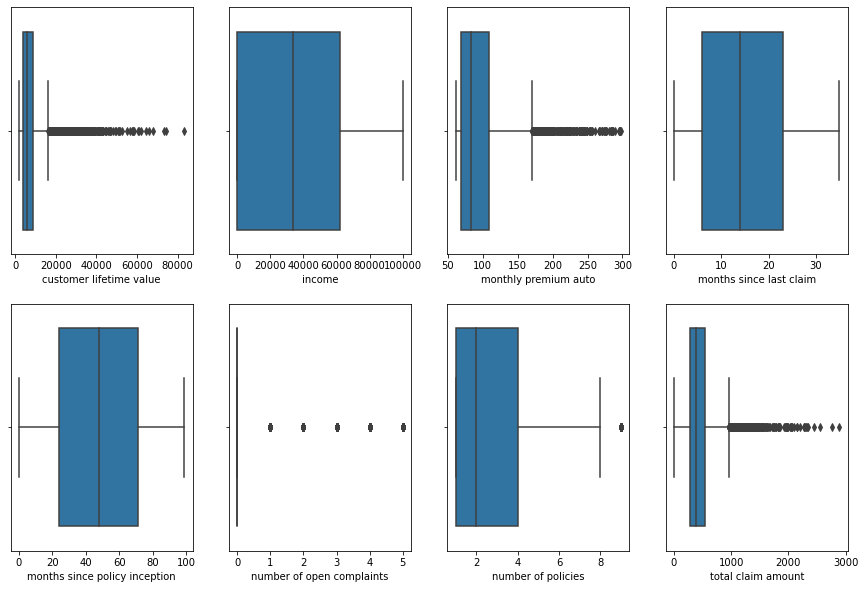

In [8]:
fig, ax = plt.subplots(2,4,figsize=(15,10))
sns.boxplot(x=data['customer lifetime value'], ax=ax[0,0])
sns.boxplot(x=data['income'], ax=ax[0,1])
sns.boxplot(x=data['monthly premium auto'], ax=ax[0,2])
sns.boxplot(x=data['months since last claim'], ax=ax[0,3])
sns.boxplot(x=data['months since policy inception'], ax=ax[1,0])
sns.boxplot(x=data['number of open complaints'], ax=ax[1,1])
sns.boxplot(x=data['number of policies'], ax=ax[1,2])
sns.boxplot(x=data['total claim amount'], ax=ax[1,3])
plt.show()

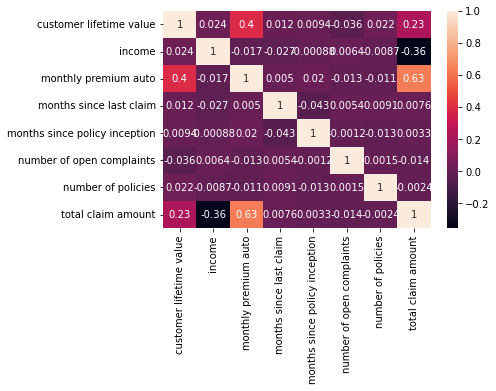

In [9]:
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### 04 - Processing Data

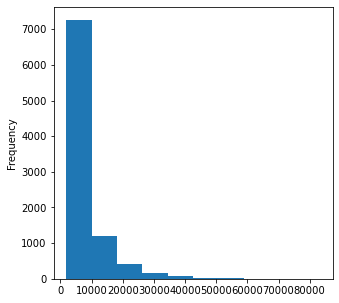

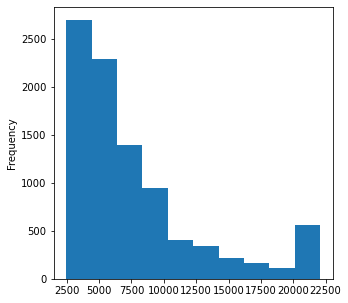

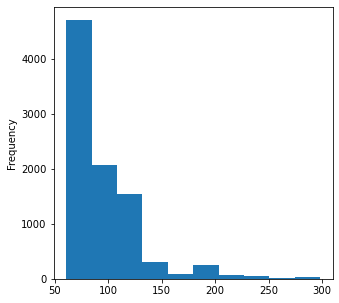

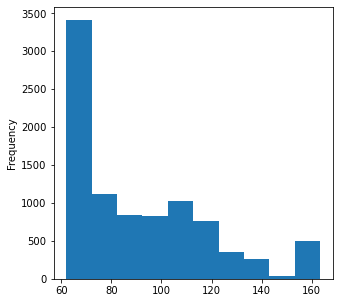

In [64]:
# Dealing with outliers.

# It might make sense to correct the outliers for "customer lifetime value" and "monthly premium auto"

clip_var = ['customer lifetime value', 'monthly premium auto']

for i in clip_var:
    transformed = 'clp_'+ i
    upper_limit = data[i].quantile(0.95)
    lower_limit = data[i].quantile(0.05)
    
    data[transformed] = data[i].clip(lower_limit, upper_limit, axis = 0)
    
    plt.figure(figsize = (5,5))
    data[i].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    data[transformed].plot(kind = 'hist')
    
    




In [67]:
numericals= data.select_dtypes(['number'])
categoricals= data.select_dtypes(['object'])

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,clp_customer lifetime value,clp_monthly premium auto
0,2763.519279,56274,69,32,5,0,1,384.811147,2763.519279,69.0
1,6979.535903,0,94,13,42,0,8,1131.464935,6979.535903,94.0
2,12887.431650,48767,108,18,38,0,2,566.472247,12887.431650,108.0
3,7645.861827,0,106,18,65,0,7,529.881344,7645.861827,106.0
4,2813.692575,43836,73,12,44,0,1,138.130879,2813.692575,73.0
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,22064.361267,73.0
9130,3096.511217,21604,79,14,28,0,1,379.200000,3096.511217,79.0
9131,8163.890428,0,85,9,37,3,2,790.784983,8163.890428,85.0
9132,7524.442436,21941,96,34,3,0,3,691.200000,7524.442436,96.0


In [68]:
# Normalization.

X_num = numericals.drop(['total claim amount','customer lifetime value', 'monthly premium auto'],axis=1)

from sklearn.preprocessing import MinMaxScaler  # sets for each column the minimum = 0 and the maximum = 1
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_num) # fit () Determine the min and the max of each column 

x_normalized = MinMaxtransformer.transform(X_num) # .transform() applies the transformation x normalized will be np.array
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

,income,months since last claim,months since policy inception,number of open complaints,number of policies,clp_customer lifetime value,clp_monthly premium auto
0,0.562847,0.914286,0.050505,0.0,0.000,0.014723,0.069068
1,0.000000,0.371429,0.424242,0.0,0.875,0.229944,0.315738
2,0.487763,0.514286,0.383838,0.0,0.125,0.531532,0.453873
3,0.000000,0.514286,0.656566,0.0,0.750,0.263959,0.434139
4,0.438443,0.342857,0.444444,0.0,0.000,0.017284,0.108535


In [69]:
# Encoding Categorical Data.

X_cat=categoricals.copy()

X_cat.describe()
X_cat.head()

# Location

X_location=pd.DataFrame(X_cat[X_cat.columns[8]])
X_cat['location code'].unique()

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(X_location) # This determines how many unique values has each categorical column

print(encoder.categories_)
encoded = encoder.transform(X_location).toarray()
X_location_enc = pd.DataFrame(encoded,columns=encoder.categories_)
X_location_enc = X_location_enc.drop(['Rural'], axis=1)
X_location_enc = X_location_enc.rename(columns={'Suburban' : 'suburban', 'Urban' : 'urban'})
display(X_location_enc.head())


# Gender

X_gender=pd.DataFrame(X_cat[X_cat.columns[7]])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(X_gender)
X_gender_trans = label_encoder.transform(X_gender) # ordered wrt value counts
X_gender_trans = pd.DataFrame(X_gender_trans,columns=X_gender.columns)
display(X_gender_trans.head())

[array(['Rural', 'Suburban', 'Urban'], dtype=object)]


,suburban,urban
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0


/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,gender
0,0
1,0
2,0
3,1
4,1


In [122]:
# Concat Data Frames again and do use X-y Split for next steps
X_new = pd.concat([x_normalized,X_gender_trans, X_location_enc],axis=1)

# print(list(X_new.columns))
# Simpler Modell database - to make it easier to interpret
#X_new = X_new.drop(['months since last claim', 'months since policy inception', 'number of open complaints',
                    #'number of policies', 'clp_customer lifetime value','gender'],axis=1)



display(X_new.head())
y = numericals['total claim amount']
display(y.head())

,income,months since last claim,months since policy inception,number of open complaints,number of policies,clp_customer lifetime value,clp_monthly premium auto,gender,"(suburban,)","(urban,)"
0,0.562847,0.914286,0.050505,0.0,0.000,0.014723,0.069068,0,1.0,0.0
1,0.000000,0.371429,0.424242,0.0,0.875,0.229944,0.315738,0,1.0,0.0
2,0.487763,0.514286,0.383838,0.0,0.125,0.531532,0.453873,0,1.0,0.0
3,0.000000,0.514286,0.656566,0.0,0.750,0.263959,0.434139,1,1.0,0.0
4,0.438443,0.342857,0.444444,0.0,0.000,0.017284,0.108535,1,0.0,0.0


0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total claim amount, dtype: float64

In [103]:
# Splitting into train set and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 5)
(1827, 5)
(7307,)
(1827,)


### 05 - Modelling

In [104]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

###  06 - Model Validation

In [105]:
# R2.
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
print("r2 for train data: ",r2_score(y_train, y_pred_train))

y_pred_test = lm.predict(X_test)
print("r2 for test data: ",r2_score(y_test, y_pred_test))

# MSE.
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_test)
print("MSE is: ",mse)

# RMSE.
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("RMSE is: ",rmse)

# MAE.
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE is: ",mae)

r2 for train data:  0.7042521105408885
r2 for test data:  0.7341359120009767
MSE is:  21176.655000031038
RMSE is:  145.52200864484738
MAE is:  107.42492692775348
